In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from numpy.random import normal

## Intro to Hypothesis Testing

### z-test

We first generate two samples from different gaussian distributions. $X_1 \sim N(0, 1)$ and $X_2 \sim N(0, 2)$

In [16]:
X = normal(0, 1, size=100)
Y = normal(2, 1, size=100)

In [17]:
df = pd.DataFrame()
df['X1'] = X
df['X2'] = Y

<AxesSubplot:>

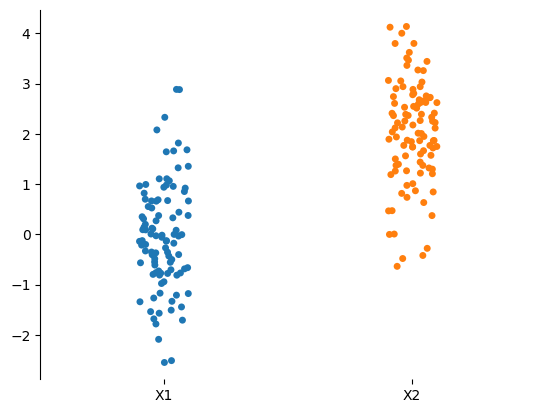

In [21]:
fig, ax = plt.subplots()

ax.spines[['right', 'top', 'bottom']].set_visible(False)

sns.stripplot(
    data=df,
    ax=ax
)

Clearly, from the plot they have different means and possibly different variance. But how do we know that for sure? This is where we can use hypothesis testing. Assume you know that each of the random variables $X_1, X_2$ come from a Normal Distribution, we can ask if the means are signficantly different, in other words:

$$H_0: \bar{X_1} - \bar{X_2} = 0$$
$$H_1: \bar{X_1} - \bar{X_2} \neq 0$$

We therefore can compute a z-score between the two means:
$$z = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\sigma_1^2 / n_1 + \sigma_2^2 / n_2}}$$

and compare the z-score with the standard normal via a table, assuming you use a $\alpha=0.05$, we can reject the null hypothesis if $|z| > 1.96$

If we know the population variance $\sigma_1^2, \sigma_2^2$, then we can plug them into the formula and use the z-test, if not we will use the t-test (covered in the next section).

Plugging everything in:

In [25]:
s1 = 1
s2 = 1
n1 = 100
n2 = 100

mean1 = np.mean(X)
mean2 = np.mean(Y)

In [26]:
z = (mean1 - mean2) / np.sqrt(s1**2 / n1 + s2**2 / n2)

In [27]:
z

-14.67725697819161

Conclusion: Since z is much less than -1.96, we conclude the two datasets have different means

This type of analysis is useful only when we know the population variance. However, the more useful test is when we don't know the population variance

### Unpaired two-sample t-test

First, let's clear up some confusing terminology and breakdown what ''unpaired two-sample t-test" means.

``unpaired": the two samples that we are comparing are not the same group of participants. In a typical drug trial, you would give each participant a unique ID and track their vitals/bio data through the trial. You can clearly identify the individual's data before and after administering the drug. That would be a paired dataset

``two-sample": there are two data sets (or two samples) that we are comparing the means

``t-test": the hypothesis test we run when we want to compare the means if we don't know the population variance (we will use sample standard deviation as a proxy)

Let's try to plug in the numbers and estimate $\hat{\sigma_1^2}, \hat{\sigma_2^2}$

In [31]:
s1_hat = np.std(X)
s2_hat = np.std(Y)

In [35]:
t = (mean1 - mean2) / np.sqrt(s1_hat**2 / n1 + s2_hat**2 / n2)

In [36]:
t

-14.105596171758744

Notice that the t-score is different than the z-score since we do not assume gaussian distribution in the dataset here. We then have to compare this t-score with the t distribution. But which table should we use? We also need the degrees of freedom (D.F.), defined as $n-1$, $n$ being the number of datapoints in the sample. With python, one can compare independent samples with the following command:

In [38]:
from scipy.stats import ttest_ind

In [39]:
ttest_ind(X, Y)

Ttest_indResult(statistic=-14.034890983799185, pvalue=1.6259174571942023e-31)